In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

1. Consider the heart disease dataset in pandas dataframe

In [8]:
Data_of_heart = pd.read_csv("./heart.csv")# Load the heart data from a CSV file 
Data_of_heart#print it 



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


checking is there any missing values !!!

In [9]:
Data_of_heart.isnull().values.any()

False

so ther is no missing values!!!1

2.Remove outliers using mean,median,Z score. 

In [17]:
# Calculate Z-scores for numeric columns
z_scores = np.abs(stats.zscore(Data_of_heart.select_dtypes(include=['int64', 'float64'])))

filter_con = (z_scores < 3).all(axis=1)

# Remove outliers
data = Data_of_heart[filter_con]
data.shape

(899, 12)

now the rows number is 899 so its verry clear that the outliers is removed perfectly

3. Convert text columns to numbers using label encoding and one hot encoding

In [18]:

categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']#text coumns details

# label encoding
lbl_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = lbl_encoder.fit_transform(data[col])
   

C:\Users\ashka\AppData\Local\Temp\ipykernel_19756\1278028943.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = lbl_encoder.fit_transform(data[col])
C:\Users\ashka\AppData\Local\Temp\ipykernel_19756\1278028943.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = lbl_encoder.fit_transform(data[col])
C:\Users\ashka\AppData\Local\Temp\ipykernel_19756\1278028943.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [19]:
data.info


<bound method DataFrame.info of      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG   
0     40    1              1        140          289          0           1  \
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  Exercis

In [20]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


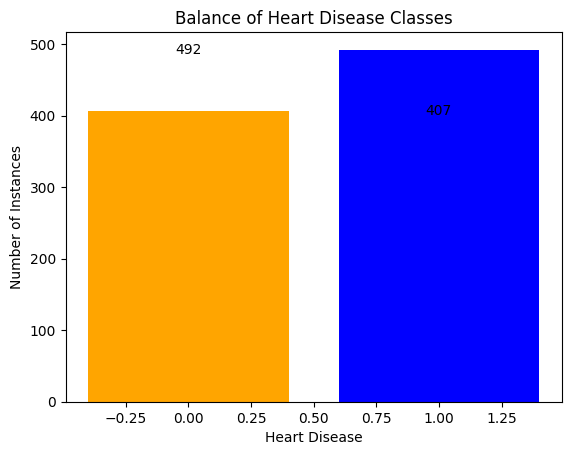

In [56]:
import matplotlib.pyplot as plt

# Count the occurrences of each class in the 'HeartDisease' column
class_counts = data['HeartDisease'].value_counts()

# Create a bar plot to visualize the balance of the dataset
plt.bar(class_counts.index, class_counts.values, color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Heart Disease')
plt.ylabel('Number of Instances')
plt.title('Balance of Heart Disease Classes')

# Add values inside each bar
for i, value in enumerate(class_counts.values):
    plt.text(i, value - 10, str(value), ha='center', va='bottom', fontsize=10)  # Adjust the vertical position

# Show the plot
plt.show()


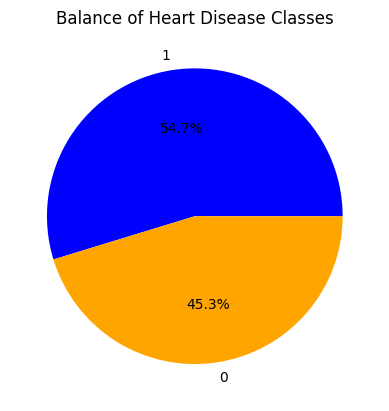

In [51]:

plt.pie(class_counts.values,
        labels=class_counts.index,
        colors=['blue', 'orange'],  # Change colors to red and green
        autopct='%1.1f%%')
plt.title('Balance of Heart Disease Classes')
plt.show()


from the bar plot and pie chart  depicts a small variation in average of the data of both peopel having heart deases(54.7%) and not(45.3%)

4.Apply scaling

In [60]:
scaler = StandardScaler()
# Splitting the data
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X#print features

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


target values

In [61]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 899, dtype: int64

5. Build a machine learning classification model using support vector machine. 
  Demonstrate the standalone model as well as Bagging model and include observations about the oerformance

In [64]:
stndaln_model = SVC(kernel='linear')#stndaln meands stand alone model
stndaln_model.fit(X_train, y_train)

SVC(kernel='linear')

In [67]:
y_p_svm_s_m = stndaln_model.predict(X_test)

In [68]:


# SVM Bagging model
svm_bagging_model = BaggingClassifier(estimator=SVC(kernel='linear'),
                                  n_estimators=500, max_samples=0.8,
                                  oob_score=True, 
                                  random_state=16)
svm_bagging_model.fit(X_train, y_train)


BaggingClassifier(estimator=SVC(kernel='linear'), max_samples=0.8,
                  n_estimators=500, oob_score=True, random_state=16)

In [70]:
y_svm_m = svm_bagging_model.predict(X_test)


In [73]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

# Assuming you have y_test and y_pred_dt_standalone_model

# Function to print a separation line
def print_separator():
    print("=" * 40)

# Decision Tree Classifier Standalone Model Evaluation
print("\n Classifier Standalone Model")
print_separator()

# Accuracy
accuracy = accuracy_score(y_test, y_p_svm_s_m)
print(f"Accuracy:   {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_p_svm_s_m)
print("Confusion Matrix:")
print(conf_matrix)

# Recall
recall = recall_score(y_test, y_p_svm_s_m)
print(f"Recall:     {recall:.4f}")

# Precision
precision = precision_score(y_test, y_p_svm_s_m)
print(f"Precision:  {precision:.4f}")

# F1 Score
f1 = f1_score(y_test, y_p_svm_s_m)
print(f"F1 Score:   {f1:.4f}")

# Print another separation line
print_separator()


# Function to print a separation line
def print_separator():
    print("=" * 40)

# Decision Tree Classifier Standalone Model Evaluation
print("\n Classifier bagging Model")
print_separator()

# Accuracy
accuracy = accuracy_score(y_test, y_svm_m)
print(f"Accuracy:   {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_svm_m)
print("Confusion Matrix:")
print(conf_matrix)

# Recall
recall = recall_score(y_test, y_svm_m)
print(f"Recall:     {recall:.4f}")

# Precision
precision = precision_score(y_test, y_svm_m)
print(f"Precision:  {precision:.4f}")

# F1 Score
f1 = f1_score(y_test, y_svm_m)
print(f"F1 Score:   {f1:.4f}")

# Print another separation line
print_separator()



 Classifier Standalone Model
Accuracy:   0.8611
Confusion Matrix:
[[66 20]
 [ 5 89]]
Recall:     0.9468
Precision:  0.8165
F1 Score:   0.8768

 Classifier bagging Model
Accuracy:   0.8667
Confusion Matrix:
[[67 19]
 [ 5 89]]
Recall:     0.9468
Precision:  0.8241
F1 Score:   0.8812
